In [1]:
#Project
import mysql.connector
import pandas as pd
import numpy as np
# import chart_studio.plotly as py
# import cufflinks as cf
from ipywidgets import interact

# cf.go_offline()
conn = mysql.connector.connect(
   host="localhost",
   user="root",
   passwd="",
   database='burmese_python_project')


df = pd.read_sql_query(
'''select *
from pythons''', conn)

df.head(5)

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
0,8303498,Travis Mangione FWC,Burmese python,Python molurus ssp. bivittatus,Positive,24 Nov 2019,,26 Nov 2019,,"Miami-Dade, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,05 Dec 2019,,,0,,,
1,8303147,Edward F. Metzger III,Burmese python,Python molurus ssp. bivittatus,Positive,20 Nov 2019,,22 Nov 2019,22 Nov 2019,"Broward, Florida, United States",...,Verified,Verified,FWCC Exotic Species Database,05 Dec 2019,,,,,,
2,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,07 Nov 2019,,12 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,14 Nov 2019,,,0,HQ freezer ...,,
3,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,06 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,
4,8295647,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,05 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,


In [2]:
df.columns

Index(['objectid', 'Reporter', 'ComName', 'SciName', 'OccStatus', 'ObsDate',
       'DateAcc', 'DateEnt', 'DateUp', 'Location', 'Latitude', 'Longitude',
       'Datum', 'CoordAcc', 'Method', 'DataType', 'LocalOwner', 'Habitat',
       'Locality', 'Site', 'InfestAcre', 'GrossAcre', 'Abundance', 'Density',
       'NumCollect', 'Percentcov', 'TreatArea', 'TreatComm', 'Quantity',
       'QuantityU', 'TrapType', 'NumTraps', 'Comments', 'VisitType',
       'CollectTme', 'Surveyor', 'RecSource', 'RecOwner', 'RecSrcTyp',
       'OrigName', 'Nativity', 'Host', 'Host_Name', 'VerifyMthd', 'IDCred',
       'Verified', 'Reviewer', 'ReviewDate', 'OrgSrcID', 'PID', 'Voucher',
       'Museum', 'MuseumRec', 'Reference'],
      dtype='object')

##### Client Question: How many python observations do you predict will be recorded for the full 2019 year? 

In [3]:
df['ObsDate'].head() # need to convert to a date-time index

0    24 Nov 2019
1    20 Nov 2019
2    07 Nov 2019
3    06 Nov 2019
4    05 Nov 2019
Name: ObsDate, dtype: object

In [4]:
df.index = pd.to_datetime(df['ObsDate']).dt.year

# df.drop(columns = ['ObsDate'], inplace = True)

df.head()

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
ObsDate,,,,,,,,,,,,,,,,,,,,,
2019,8303498,Travis Mangione FWC,Burmese python,Python molurus ssp. bivittatus,Positive,24 Nov 2019,,26 Nov 2019,,"Miami-Dade, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,05 Dec 2019,,,0,,,
2019,8303147,Edward F. Metzger III,Burmese python,Python molurus ssp. bivittatus,Positive,20 Nov 2019,,22 Nov 2019,22 Nov 2019,"Broward, Florida, United States",...,Verified,Verified,FWCC Exotic Species Database,05 Dec 2019,,,,,,
2019,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,07 Nov 2019,,12 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,14 Nov 2019,,,0,HQ freezer ...,,
2019,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,06 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,
2019,8295647,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,05 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,


#### Plan of attack
set the obsdate as the index, as a datetime, drop everything but "objectid", (group on date here?), and then fill in the missing dates with 0. from there, pass it to the model

In [6]:
df.index = pd.to_datetime(df['ObsDate'])

time_df = df

# time_df['sightings'] = df['objectid'].value_counts() # gives warning

time_df.sort_index(inplace = True)

time_df

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
ObsDate,,,,,,,,,,,,,,,,,,,,,
1979-10-24,3067952,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,24 Oct 1979,,17 Oct 2013,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1995-12-12,615739,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,12 Dec 1995,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,Florida Museum of Natural History ...,"UF 146714, 147499 ...",Florida Museum of Natural History. Herpetolog...
1996-02-12,3067680,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,12 Feb 1996,,17 Oct 2013,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1996-11-18,3067679,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,18 Nov 1996,,17 Oct 2013,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1997-11-03,615765,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,03 Nov 1997,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,Florida Museum of Natural History Herpetology ...,UF 147495 ...,Florida Museum of Natural History. Herpetology...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-06,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,06 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,
2019-11-07,8295635,Jeffrey Fobb Miami-Dade Fire Rescue,Burmese python,Python molurus ssp. bivittatus,Positive,07 Nov 2019,,07 Nov 2019,07 Nov 2019,"Miami-Dade, Florida, United States",...,Verified,Verified,FWCC Exotic Species Database,08 Nov 2019,,,,,,
2019-11-07,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,07 Nov 2019,,12 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,14 Nov 2019,,,0,HQ freezer ...,,


so now I need to extract 2019 from this time_df, so that it can be my target

In [7]:
target = time_df.loc['2019']

target

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
ObsDate,,,,,,,,,,,,,,,,,,,,,
2019-01-02,8249408,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,02 Jan 2019,,03 Aug 2019,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,,,
2019-01-02,8250994,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,02 Jan 2019,,03 Aug 2019,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,,,
2019-01-04,8250999,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,04 Jan 2019,,03 Aug 2019,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,,,
2019-01-04,8250985,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,04 Jan 2019,,03 Aug 2019,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,,,
2019-01-05,8251407,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,05 Jan 2019,,03 Aug 2019,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-06,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,06 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,
2019-11-07,8295635,Jeffrey Fobb Miami-Dade Fire Rescue,Burmese python,Python molurus ssp. bivittatus,Positive,07 Nov 2019,,07 Nov 2019,07 Nov 2019,"Miami-Dade, Florida, United States",...,Verified,Verified,FWCC Exotic Species Database,08 Nov 2019,,,,,,
2019-11-07,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,07 Nov 2019,,12 Nov 2019,,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,14 Nov 2019,,,0,HQ freezer ...,,


In [8]:
# now collect everything before 2019 as my training data
begin = pd.Timestamp('1979-10-24')
end = pd.Timestamp('2018-12-31') # should adjust to july 31 2019 to account for the data gathered this year?

training = time_df.truncate(before=begin, after=end)

# training = time_df.loc[:'2019']
# training # why does this still show 2019??

training

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
ObsDate,,,,,,,,,,,,,,,,,,,,,
1979-10-24,3067952,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,24 Oct 1979,,17 Oct 2013,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1995-12-12,615739,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,12 Dec 1995,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,Florida Museum of Natural History ...,"UF 146714, 147499 ...",Florida Museum of Natural History. Herpetolog...
1996-02-12,3067680,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,12 Feb 1996,,17 Oct 2013,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1996-11-18,3067679,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,18 Nov 1996,,17 Oct 2013,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1997-11-03,615765,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,03 Nov 1997,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,Florida Museum of Natural History Herpetology ...,UF 147495 ...,Florida Museum of Natural History. Herpetology...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30,8250925,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,30 Dec 2018,,03 Aug 2019,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,,,
2018-12-30,8241927,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,30 Dec 2018,,03 Aug 2019,,"Broward, Florida, United States",...,Verified,Verified,,,,,,,,
2018-12-31,8251395,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,31 Dec 2018,,03 Aug 2019,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,,,


In [9]:
training.drop(columns = 'ObsDate', axis = 1, inplace = True)

training

,objectid,Reporter,ComName,SciName,OccStatus,DateAcc,DateEnt,DateUp,Location,Latitude,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
ObsDate,,,,,,,,,,,,,,,,,,,,,
1979-10-24,3067952,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.75931,...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1995-12-12,615739,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",25.22278,...,Verified,Verified,,,,,,Florida Museum of Natural History ...,"UF 146714, 147499 ...",Florida Museum of Natural History. Herpetolog...
1996-02-12,3067680,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.26356,...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1996-11-18,3067679,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.64142,...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1997-11-03,615765,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",25.38235,...,Verified,Verified,,,,,,Florida Museum of Natural History Herpetology ...,UF 147495 ...,Florida Museum of Natural History. Herpetology...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30,8250925,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.69986,...,Verified,Verified,,,,,,,,
2018-12-30,8241927,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,03 Aug 2019,,"Broward, Florida, United States",26.33000,...,Verified,Verified,,,,,,,,
2018-12-31,8251395,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.84732,...,Verified,Verified,,,,,,,,


In [10]:
training.reset_index(inplace = True)

training.head()

,ObsDate,objectid,Reporter,ComName,SciName,OccStatus,DateAcc,DateEnt,DateUp,Location,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
0,1979-10-24,3067952,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,17 Oct 2013,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
1,1995-12-12,615739,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,Florida Museum of Natural History ...,"UF 146714, 147499 ...",Florida Museum of Natural History. Herpetolog...
2,1996-02-12,3067680,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,17 Oct 2013,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
3,1996-11-18,3067679,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,17 Oct 2013,,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...
4,1997-11-03,615765,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",...,Verified,Verified,,,,,,Florida Museum of Natural History Herpetology ...,UF 147495 ...,Florida Museum of Natural History. Herpetology...


In [11]:
training['ObsDate'].dtype

dtype('<M8[ns]')

In [12]:
# now, group by the dates so that the sightings are counted by Date

# training.pivot_table(index = 'ObsDate', values = 'objectid', aggfunc = 'count') # why isn't this working?
training_pivot = pd.pivot_table(training, index = 'ObsDate', values = 'objectid', aggfunc = 'count' )
training_pivot

,objectid
ObsDate,
1979-10-24,1
1995-12-12,1
1996-02-12,1
1996-11-18,1
1997-11-03,2
...,...
2018-12-27,4
2018-12-28,3
2018-12-29,3


In [13]:
training_pivot.index = pd.to_datetime(training_pivot.index) # doesn't work because the dtype of the index is '<M8[ns]', not "Datetime"

In [14]:
# training_pivot = training_pivot.resample('D')
training_pivot2 = training_pivot.resample('D').count().fillna(0)

In [15]:
training_pivot2

,objectid
ObsDate,
1979-10-24,1
1979-10-25,0
1979-10-26,0
1979-10-27,0
1979-10-28,0
...,...
2018-12-27,1
2018-12-28,1
2018-12-29,1


In [16]:
target.drop(columns = 'ObsDate', axis = 1, inplace = True)

/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
target

,objectid,Reporter,ComName,SciName,OccStatus,DateAcc,DateEnt,DateUp,Location,Latitude,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
ObsDate,,,,,,,,,,,,,,,,,,,,,
2019-01-02,8249408,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.33997,...,Verified,Verified,,,,,,,,
2019-01-02,8250994,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.73368,...,Verified,Verified,,,,,,,,
2019-01-04,8250999,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.73535,...,Verified,Verified,,,,,,,,
2019-01-04,8250985,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.73313,...,Verified,Verified,,,,,,,,
2019-01-05,8251407,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.86322,...,Verified,Verified,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-06,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,,07 Nov 2019,,"Collier, Florida, United States",25.83131,...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,
2019-11-07,8295635,Jeffrey Fobb Miami-Dade Fire Rescue,Burmese python,Python molurus ssp. bivittatus,Positive,,07 Nov 2019,07 Nov 2019,"Miami-Dade, Florida, United States",25.82564,...,Verified,Verified,FWCC Exotic Species Database,08 Nov 2019,,,,,,
2019-11-07,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,,12 Nov 2019,,"Collier, Florida, United States",25.86434,...,Credible,Verified,FWCC Exotic Species Database,14 Nov 2019,,,0,HQ freezer ...,,


In [18]:
target.reset_index(inplace = True)
target_pivot = pd.pivot_table(target, index = 'ObsDate', values = 'objectid', aggfunc = 'count' )
# target.index = pd.to_datetime(target_pivot.index)
target_pivot2 = target_pivot.resample('D').count().fillna(0)
target_pivot2

,objectid
ObsDate,
2019-01-02,1
2019-01-03,0
2019-01-04,1
2019-01-05,1
2019-01-06,0
...,...
2019-11-20,1
2019-11-21,0
2019-11-22,0


In [ ]:
# training / test data is ready

In [21]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(
    training_pivot2,
    freq = 'D', # daily frequency
    order = (2, 1),
).fit()


In [22]:
predictions = model.predict(
    start = len(training_pivot2), # in terms of index, where do we want to start and end? start at the END of your training data
    end = len(training_pivot2) + len(target_pivot2) - 1, # and end at the END of our testing data
)

### Expected Number of Python Sightings in 2019

In [27]:
# how to get the sum of the 2019 year? 
round(predictions.sum())

204.0

###### Are there geographic hotspots? If so, what are the probabilities that volunteers will find pythons in those areas between today's date and Dec 31st?

In [29]:
# from this Time-Series data above, work on Probability of finding snakes in the geographic hotspots between now and Dec 31
# group the data by Month-day, ignoring the year,
# 
# a python was sighted on this day for x out of the total years, 
# sum the probabilities for today's date through 12/31

# first need to review git. i need the counties data from elda, how can I make sure I effectively merge that with my own code? 

# based on 2018's December data,
# every day is a success/failure for those days
# probability for 2018 - days of success / total days

# apply that prob to 2019, with the remaining days

In [34]:
last_year = time_df.loc['2018-12']

last_year.drop(columns = 'ObsDate', axis = 1, inplace = True)

last_year

,objectid,Reporter,ComName,SciName,OccStatus,DateAcc,DateEnt,DateUp,Location,Latitude,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
ObsDate,,,,,,,,,,,,,,,,,,,,,
2018-12-01,8240169,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Collier, Florida, United States",25.94577,...,Verified,Verified,,,,,,,,
2018-12-01,8240170,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Collier, Florida, United States",25.94577,...,Verified,Verified,,,,,,,,
2018-12-01,7827675,Mark Procter,Burmese python,Python molurus ssp. bivittatus,Positive,,01 Dec 2018,01 Dec 2018,"Collier, Florida, United States",26.10031,...,Possible,Verified,FWCC Exotic Species Database,03 Dec 2018,,,,,,
2018-12-03,8243480,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Manatee, Florida, United States",27.50771,...,Verified,Verified,,,,,,,,
2018-12-03,7829338,Robert Hinson Big Cypress National Preserve,Burmese python,Python molurus ssp. bivittatus,Positive,,10 Dec 2018,,"Collier, Florida, United States",25.80743,...,Verified,Verified,FWCC Exotic Species Database,13 Dec 2018,,,0,USGS ...,,
2018-12-04,7827802,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,,04 Dec 2018,10 Dec 2018,"Collier, Florida, United States",25.90142,...,Credible,Verified,FWCC Exotic Species Database,04 Dec 2018,,,0,BICY freezer for USGS pickup ...,,
2018-12-04,8250869,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.67811,...,Verified,Verified,,,,,,,,
2018-12-04,8242509,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,03 Aug 2019,,"Lee, Florida, United States",26.43832,...,Verified,Verified,,,,,,,,
2018-12-05,8250330,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.46568,...,Verified,Verified,,,,,,,,


In [35]:
last_year_ridx = last_year.reset_index()
last_year_pivot = pd.pivot_table(last_year_ridx, index = 'ObsDate', values = 'objectid', aggfunc = 'count' )

In [36]:
last_year_pivot

,objectid
ObsDate,
2018-12-01,3
2018-12-03,2
2018-12-04,3
2018-12-05,1
2018-12-08,2
2018-12-09,2
2018-12-11,5
2018-12-12,3
2018-12-13,2


In [ ]:
# every day had multiple python sightings in Dec2018,
# so my PRIORS would be the number of python sightings that day, divided by the total number of sightings that month?
# subset down to "so far this month" first

In [37]:
month_remaining2018 = last_year_pivot.loc['2018-12-14':]

In [38]:
month_remaining2018

,objectid
ObsDate,
2018-12-14,3
2018-12-15,2
2018-12-16,4
2018-12-17,1
2018-12-19,4
2018-12-20,1
2018-12-21,1
2018-12-22,1
2018-12-23,1


In [48]:
month_remaining2018_ridx = month_remaining2018.reset_index()

In [49]:
days_remaining = len(month_remaining2018)

days_remaining

16

In [50]:
month_remaining2018['objectid'] / 16

ObsDate
2018-12-14    0.1875
2018-12-15    0.1250
2018-12-16    0.2500
2018-12-17    0.0625
2018-12-19    0.2500
2018-12-20    0.0625
2018-12-21    0.0625
2018-12-22    0.0625
2018-12-23    0.0625
2018-12-24    0.0625
2018-12-26    0.0625
2018-12-27    0.2500
2018-12-28    0.1875
2018-12-29    0.1875
2018-12-30    0.1250
2018-12-31    0.1875
Name: objectid, dtype: float64

In [52]:
month_remaining2018_ridx['percSnake'] = month_remaining2018_ridx['objectid'] / int(days_remaining)

In [53]:
month_remaining2018_ridx

,ObsDate,objectid,percSnake
0,2018-12-14,3,0.1875
1,2018-12-15,2,0.1250
2,2018-12-16,4,0.2500
3,2018-12-17,1,0.0625
4,2018-12-19,4,0.2500
5,2018-12-20,1,0.0625
6,2018-12-21,1,0.0625
7,2018-12-22,1,0.0625
8,2018-12-23,1,0.0625
9,2018-12-24,1,0.0625


In [ ]:
# BAYES
# bowls = [0.5, 0.5] # this will be my Priors, the probability of selecting each bowl
# vanilla = [30/40, 20/40] # Likelihoods, the probability of selecting vanilla from each bowl

# def bayes_theorem(priors: list, likelihoods: list) -> np.array: # each should be a list, returns an array
#     marginal_prob = sum(np.multiply(priors, likelihoods))
#     posterior_prob = np.divide(np.multiply(priors, likelihoods), marginal_prob)
#     return posterior_prob

# bayes_theorem(bowls, vanilla) # returns an array([0.6, 0.4]), so the first value is bowlOne, and second is bowlTwo

# print("The Probability that the Vanilla cookie I selected was from bowl one is " + str(bayes_theorem(bowls, vanilla)[0]))

In [54]:
list(month_remaining2018_ridx['percSnake'])

[0.1875,
 0.125,
 0.25,
 0.0625,
 0.25,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.25,
 0.1875,
 0.1875,
 0.125,
 0.1875]

In [58]:
def bayes_theorem(priors: list, likelihoods: list) -> np.array: # each should be a list, returns an array
    marginal_prob = sum(np.multiply(priors, likelihoods))
    posterior_prob = np.divide(np.multiply(priors, likelihoods), marginal_prob)
    return posterior_prob

priors = [1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, ] # same probability for every remaining day, of which there are 16
likelihoods = list(month_remaining2018_ridx['percSnake']) # likelihood of finding snakes that day

bayes_theorem(priors, likelihoods)
# sum(bayes_theorem(priors, likelihoods)) # sum the probabilities is equal to one. this is "given that a python was sighted between now and EOY, what is the probability it was on a specific day of the month, based on 2018 December data"
# this also fails to account for the geographic hotspots, I need to have subsetted the data down to those three counties before calculating likelihoods


array([0.08571429, 0.05714286, 0.11428571, 0.02857143, 0.11428571,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.11428571, 0.08571429, 0.08571429, 0.05714286,
       0.08571429])

In [62]:
month_remaining2018_ridx['Prob_by_Day2019'] = pd.Series(bayes_theorem(priors, likelihoods))

In [64]:
month_remaining2018_ridx.drop(columns = 'Prob_by_Day', axis = 1, inplace = True)

In [65]:
month_remaining2018_ridx

,ObsDate,objectid,percSnake,Prob_by_Day2019
0,2018-12-14,3,0.1875,0.085714
1,2018-12-15,2,0.1250,0.057143
2,2018-12-16,4,0.2500,0.114286
3,2018-12-17,1,0.0625,0.028571
4,2018-12-19,4,0.2500,0.114286
5,2018-12-20,1,0.0625,0.028571
6,2018-12-21,1,0.0625,0.028571
7,2018-12-22,1,0.0625,0.028571
8,2018-12-23,1,0.0625,0.028571
9,2018-12-24,1,0.0625,0.028571


In [66]:
from scipy.stats import sem, t

def conf_interval(sample, confidence):
    return t.interval(
        confidence, # confidence level, passed in as an argument
        len(sample) - 1, # degrees of freedom
        loc = sample.mean(),
        scale = sem(sample),
    )

conf_interval(bayes_theorem(priors, likelihoods), 0.9) # 90% confidence

(0.04718531886071421, 0.07781468113928579)

We are 90% confident that the average probability of python sightings is between 0.47 and 0.78

### Are the sightings cyclical?

Analysis: It is important to understand the difference between "seasonal" and "cyclical". 

Seasonal data is impacted by the seasons
<br> Cyclical data fluctuates without a fixed time period

In this case, as we see in the below graphs, we believe that the data is seasonal, the fluctuations occur at a fixed time period.

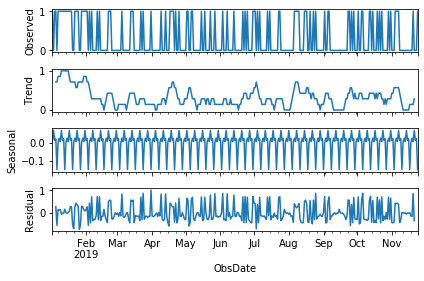

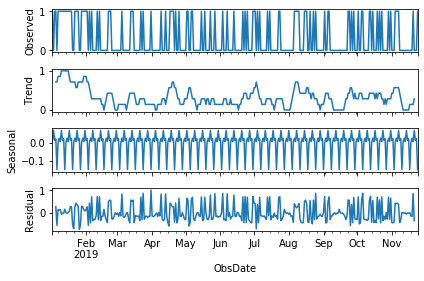

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

my_graph = seasonal_decompose(target_pivot2)

my_graph.plot()